In [107]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [200]:
data_path = '..\data\interim\dataset_2017_2018[Preprocess].csv'
df_data_2017_2018 = pd.read_csv(data_path)
data_path = '..\data\external\dados_cetesb_2020.csv'
df_data_2020 = pd.read_csv(data_path)
df_data = pd.concat([df_data_2017_2018,df_data_2020])
df_data_2020.sample(5)

,ts,Temperatura,Umidade
3016,2020-05-05 16:00:00,27.9,34.0
3169,2020-05-12 01:00:00,15.2,70.0
2504,2020-04-14 08:00:00,18.2,77.0
3582,2020-05-29 06:00:00,10.8,82.0
305,2020-01-13 17:00:00,24.4,81.0


In [201]:
df_data['ts'] = pd.to_datetime(df_data['ts'])
df_data = df_data.set_index('ts')
df_data.describe()

,Temperatura,Umidade
count,21168.000000,21168.000000
mean,21.928538,65.733808
std,4.771493,18.521315
min,7.113333,6.843167
25%,18.655536,52.319684
50%,21.485833,69.522500
75%,25.313750,80.016667
max,36.000000,100.000000


<IPython.core.display.Javascript object>


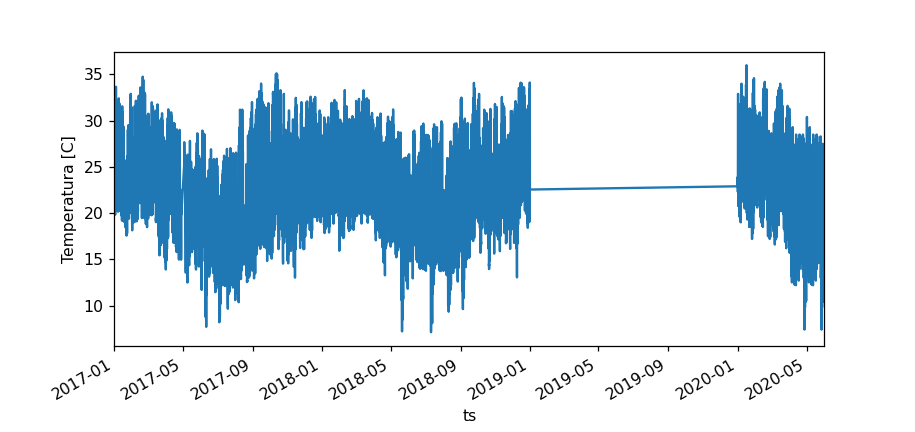

Text(0, 0.5, 'Temperatura [C]')

In [203]:
df_data['Temperatura'].plot()
plt.ylabel('Temperatura [C]')

In [195]:
def get_humidex(T,H):
    z = 6.112*(10**((7.5*T)/(237.7+T)))*(H/100)
    return T+((5/9)*(z-10))

max_p90 = df_data['Temperatura'].quantile(.9)
print(max_p90)

df_data['Humidex'] = get_humidex(df_data['Temperatura'].values,df_data['Umidade'].values)
df_data

28.635


,Temperatura,Umidade,Humidex
ts,,,
2017-01-01 00:00:00,21.458000,86.760000,28.211429
2017-01-01 01:00:00,21.828333,83.500000,28.390057
2017-01-01 02:00:00,21.281667,87.716667,28.037330
2017-01-01 03:00:00,20.755000,91.250000,27.599527
2017-01-01 04:00:00,20.731667,90.300000,27.429513
...,...,...,...
2020-05-31 19:00:00,19.800000,36.000000,18.856689
2020-05-31 20:00:00,16.700000,47.000000,16.102868
2020-05-31 21:00:00,15.100000,54.000000,14.688281


<IPython.core.display.Javascript object>


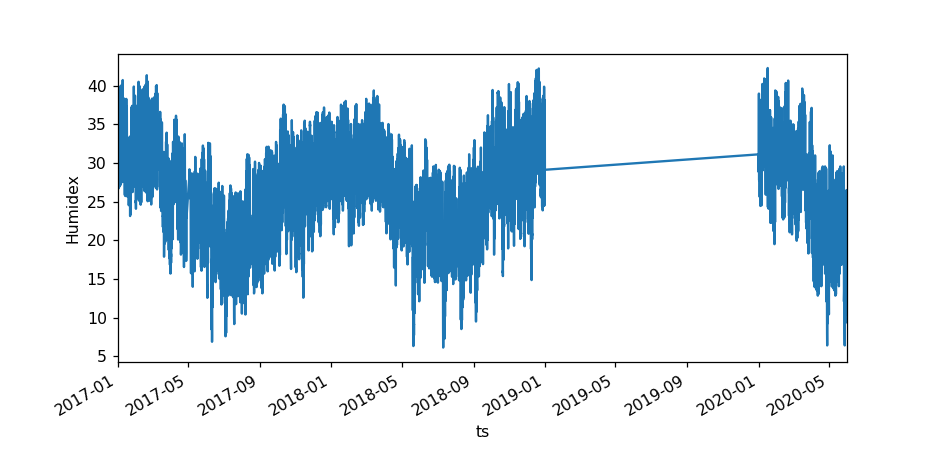

Text(0, 0.5, 'Humidex')

In [197]:
df_data['Humidex'].plot()
plt.ylabel('Humidex')

In [112]:
nivel = []
humidex_values = df_data['Humidex'].values
for h in humidex_values:
    if h<=29: 
        nivel.append('comfortable')
    elif h<=39: 
        nivel.append('some discomfort')
    elif h<=45: 
        nivel.append('great discomfort')
    else: 
        nivel.append('dangerous')
df_data['Nivel'] = nivel

In [113]:
(df_data.Nivel=='great discomfort').sum()

199

In [ ]:
df_data.to_csv('..\data\processed\\time_series[Transformation].csv',index_label='ts')

In [114]:
df_H = df_data[['Humidex']].copy()
df_H['interval'] = df_H.index.time
df_H.index = df_H.index.date
df_pivot_H = df_H.pivot(columns='interval')
df_pivot_H = df_pivot_H.dropna()

In [191]:
df_pivot_H.sample(5)

Humidex                                                         \
interval     00:00:00   01:00:00   02:00:00   03:00:00   04:00:00   05:00:00   
2017-09-20  20.564652  20.201668  19.661556  19.152986  18.714096  18.281239   
2020-04-21  20.397499  20.689732  20.419947  19.631825  19.024744  18.513284   
2017-01-18  27.059823  27.113041  27.166896  27.235767  27.307700  27.538953   
2020-05-27  14.644382  11.480943   8.997995   7.973383   7.767785   6.782759   
2017-07-20  13.207638  13.133415  12.980609  12.830916  12.668682  12.481071   

                                                        ...             \
interval     06:00:00   07:00:00   08:00:00   09:00:00  ...   14:00:00   
2017-09-20  18.511296  21.224921  25.068276  27.081938  ...  31.610049   
2020-04-21  17.945827  16.884821  18.871530  22.396095  ...  26.954640   
2017-01-18  28.027829  28.767170  29.649865  30.546905  ...  32.039519   
2020-05-27   6.639465   6.419949   9.018696  14.172663  ...  21.374026   
2017-07-20  11.895969  12.076004  13.681351  18.221312  ...  25.675354   

                                                                              \
interval     15:00:00   16:00:00   17:00:00   18:00:00   19:00:00   20:00:00   
2017-09-20  31.545084  30.354623  28.674135  27.415458  27.122688  25.897558   
2020-04-21  26.208613  25.454167  24.691991  23.922742  23.147045  22.365492   
2017-01-18  32.730181  32.861083  30.119308  30.386088  29.547841  28.768704   
2020-05-27  22.153984  22.746685  21.515534  18.813309  16.555077  15.915897   
2017-07-20  24.902079  24.801481  23.123797  21.350357  20.533623  20.959213   

                                             
interval     21:00:00   22:00:00   23:00:00  
2017-09-20  24.595643  23.711498  22.595077  
2020-04-21  21.578651  20.927141  20.096084  
2017-01-18  28.421413  28.141611  28.150374  
2020-05-27  14.991135  15.364472  15.817937  
2017-07-20  19.993212  19.026475  17.870762  

[5 rows x 24 columns]

In [123]:
df_pivot_H['Humidex'].to_csv('..\data\processed\\time_series[Transformation].csv',index_label='ts')

335 335


<IPython.core.display.Javascript object>


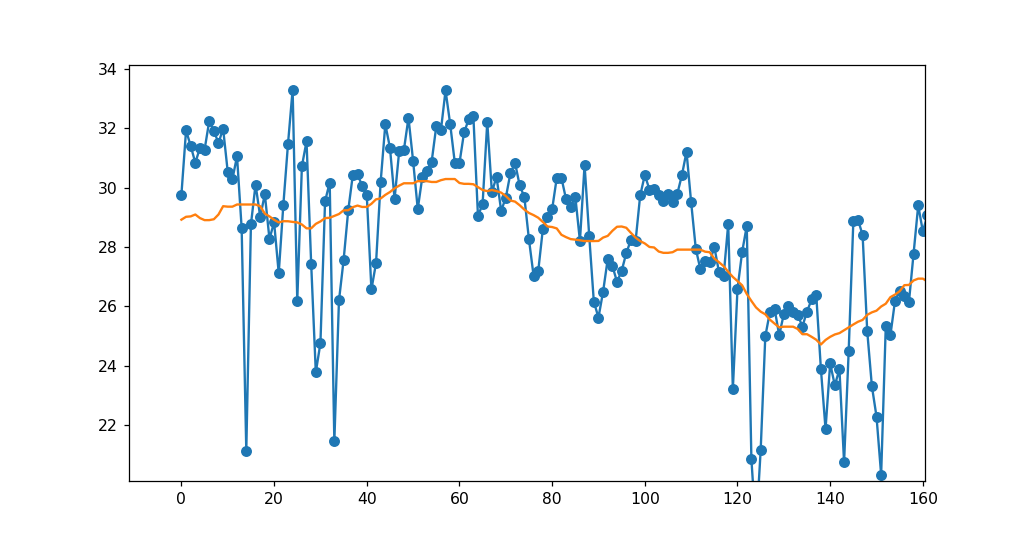

13
12
7
13
8
14
7
6
6
6
5
7
Olas de calor:  12


In [189]:
df_T = df_data[['Temperatura']].copy()
df_T['interval'] = df_T.index.time
df_T.index = df_T.index.date
df_pivot_T = df_T.pivot(columns='interval')
df_pivot_T = df_pivot_T.dropna()

df_hw = df_pivot_T.copy()
df_hw.index = pd.to_datetime(df_hw.index)
df_hw = df_hw[df_hw.index.year==2018]


jdate = '2018-01-16'
fmt = '%Y-%m-%d'
day = datetime.datetime.strptime(jdate, fmt).date()

heat_wave = []
P_90s = []
Tmax = []
for i in range(335):
    max_date_limit = day + datetime.timedelta(days=15)
    min_date_limit = day - datetime.timedelta(days=15)
    #print(max_date_limit,'- [',day,'] -',min_date_limit)
    dates = pd.date_range(min_date_limit,max_date_limit,freq='D')
    temperaturas = []
    for d in dates:
        temperaturas.append(df_hw.loc[d].ravel())
    temperaturas = np.array(temperaturas).ravel()
    max_P90 = np.quantile(temperaturas,.9)
    #print('P90 = ',max_P90)
    cant = (df_hw.loc[day].ravel() > max_P90).sum()
    if cant>0:
        heat_wave.append(True)
    else:
        heat_wave.append(False)
    P_90s.append(max_P90)
    Tmax.append(df_hw.loc[day].ravel().max())
    #print(df_hw.loc[day].ravel())
    day = day + datetime.timedelta(days=1)
print(len(Tmax),len(P_90s))
plt.scatter(np.arange(335),np.array(Tmax))
plt.plot(np.array(Tmax))
plt.plot(np.array(P_90s))
cont = 0
olas = 0
for i in range(len(heat_wave)):
    if heat_wave[i]:
        cont+=1
    else:
        if cont > 4:
            print('Heat wave days: 'cont)
            olas+=1
        cont = 0
print('Heat waves: ',olas)